# San Francisco - N cable cars?

In San Francisco there exist N calbe cars, numbered sequentially from 1 to N. We see one random cable car thats numbered 203. We want to estimate _N_.

## (a)

Assume that our prior belifes on _N_ is a gemoetric distribution with mean 100:

$$p(N) = \frac{1}{100} \frac{99}{100}^{N-1}, \quad N=1,2,...$$

What is the posterior distribution for _N_?

To be able to caluclate a posteiror distribution, we need a model/likelihood. In this problem we'll use a uniform distribution:

$$f(y|N) = \frac1N$$

Thus the posterior distribution will be:

\begin{align*}
\pi(N|y) &= \frac{1}{f_{marg}(y)}  \frac{1}{100} \frac{99}{100}^{N-1} \frac1N \\
&\propto  \frac{99}{100}^{N-1} \frac1N, \quad \text{for }N \geq 203
\end{align*}

Note that we need to find our constants in this problem, but we can simulate it!y

## (b) 

What is the posterior mean and standard deviation of _N_?

This one can be a be a bit tricky to by hand, but easy to do using computer power. We know that the posterior distribution is 

$$\pi(N|y) = \frac1c \frac{99}{100}^{N-1} \frac1N$$

Since our posterior is a pmf, we know that it should sum to 1. Let's find our constant:

In [49]:
import numpy as np
import scipy.stats as stats
obs = 203
N_val = np.arange(1, 10**5, 1)

prior = 1/100 * (99/100)**(N_val-1)  # just for visualization later
pre_post = (99/100)**(N_val-1) * (1/N_val) * (obs<=N_val) 
c = sum(pre_post)
print(f"Constant: {c}")
print(f"1/c = {c**-1}")

Constant: 0.04705083659735962
1/c = 21.253607211229006


Thus our posterior will then be:

In [50]:
post = 1/c * pre_post

Let's visualize the prior and posterior distribution:

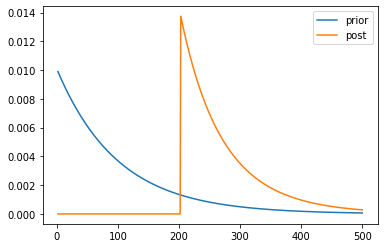

In [51]:
import matplotlib.pyplot as plt
plt.plot(N_val[1:500], prior[1:500], label="prior")
plt.plot(N_val[1:500],post[1:500], label="post")
plt.legend()
plt.show()

Now, for the mean and stdandard deviations for the posterior distribution. Formula for the expected value:

\begin{align*}
E(N) &= \sum_{N=203}^{\infty} N \cdot \frac1c \frac{99}{100}^{N-1} \frac1N \\
&= \frac1c \sum_{N=203}^{\infty} \frac{99}{100}^{N-1}
\end{align*}

For the standard deviation we get the following formula:

\begin{align*}
SD(N) &= \sqrt{Var(N)} \\
&= \sqrt{E(N^2) - (E(N))^2} \\
&= \sqrt{\frac1c \sum_{N=203}^{\infty} N \cdot \frac{99}{100}^{N-1} - (E(N))^2}
\end{align*}

Lets find them by using Python:

In [53]:
mean_post = 1/c * sum([(99/100)**(N-1) for N in range(obs, 10**5, 1)])
sd_post = np.sqrt(1/c *sum([N*(99/100)**(N-1) for N in range(obs, 10**5, 1)]) - mean_post**2)

print(f"Mean: {round(mean_post, 3)}\nSD: {round(sd_post, 3)}")

Mean: 279.089
SD: 79.965


__Extra from Nils__

Say now that we now have 3 observations instead of 1. Our observations are 203, 157 and 222. Now, our likelihood would look like this:

$$f(y_1, y_2, y_3|N) = \left(\frac{1}{N}\right)^3$$

and our posterior will then become:

$$\pi(N|y_1,y_2,y_3) = \frac1c \cdot \left(\frac{1}{N}\right)^3 \frac{99}{100}^{N-1}$$

Calculate mean and standard deviation using the "new" posterior and compare the results.

In [62]:
new_obs = [203, 157, 222]
new_pre_post = (99/100)**(N_val-1) * (1/N_val)**3 * (max(new_obs)<=N_val) 
c = sum(new_pre_post)
new_post = 1/c * new_pre_post

mean_new_post = 1/c * sum([(1/N)**2 * (99/100)**(N-1) for N in range(max(new_obs), 10**5, 1)])
sd_new_post = np.sqrt(1/c *sum([1/N * (99/100)**(N-1) for N in range(max(new_obs), 10**5, 1)]) - mean_new_post**2)

print(f"Mean: {round(mean_new_post, 3)}\nSD: {round(sd_new_post, 3)}")

Mean: 272.578
SD: 55.09


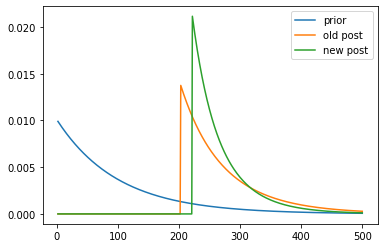

In [63]:
plt.plot(N_val[1:500], prior[1:500], label="prior")
plt.plot(N_val[1:500],post[1:500], label="old post")
plt.plot(N_val[1:500],new_post[1:500], label="new post")
plt.legend()
plt.show()